In [1]:
import os
import subprocess
import time
from IPython.display import SVG, clear_output

In [2]:
file_to_watch = "kyria_rev3.keymap"
base_name = "kyria"
parse_cmd = f"keymap -c config.yaml parse -z {file_to_watch}"
draw_cmd = f"keymap -c config.yaml draw  --qmk-keyboard splitkb/kyria/rev3 {base_name}.yaml"

In [3]:
print(parse_cmd)
print(draw_cmd)

keymap -c config.yaml parse -z kyria_rev3.keymap
keymap -c config.yaml draw  --qmk-keyboard splitkb/kyria/rev3 kyria.yaml


In [4]:
def run_parse_and_draw():
    parse_exec = subprocess.run(parse_cmd, shell=True, stdout=subprocess.PIPE)
    if parse_exec.returncode != 0:
        print(parse_exec.stdout.decode())
    else:
        with open(f"{base_name}.yaml", 'w') as f:
            f.write(parse_exec.stdout.decode())
    draw_exec = subprocess.run(draw_cmd, shell=True, stdout=subprocess.PIPE)
    if draw_exec.returncode != 0:
        print(draw_exec.stdout.decode())
    else:
        with open(f"{base_name}.svg", 'w') as f:
            f.write(draw_exec.stdout.decode())

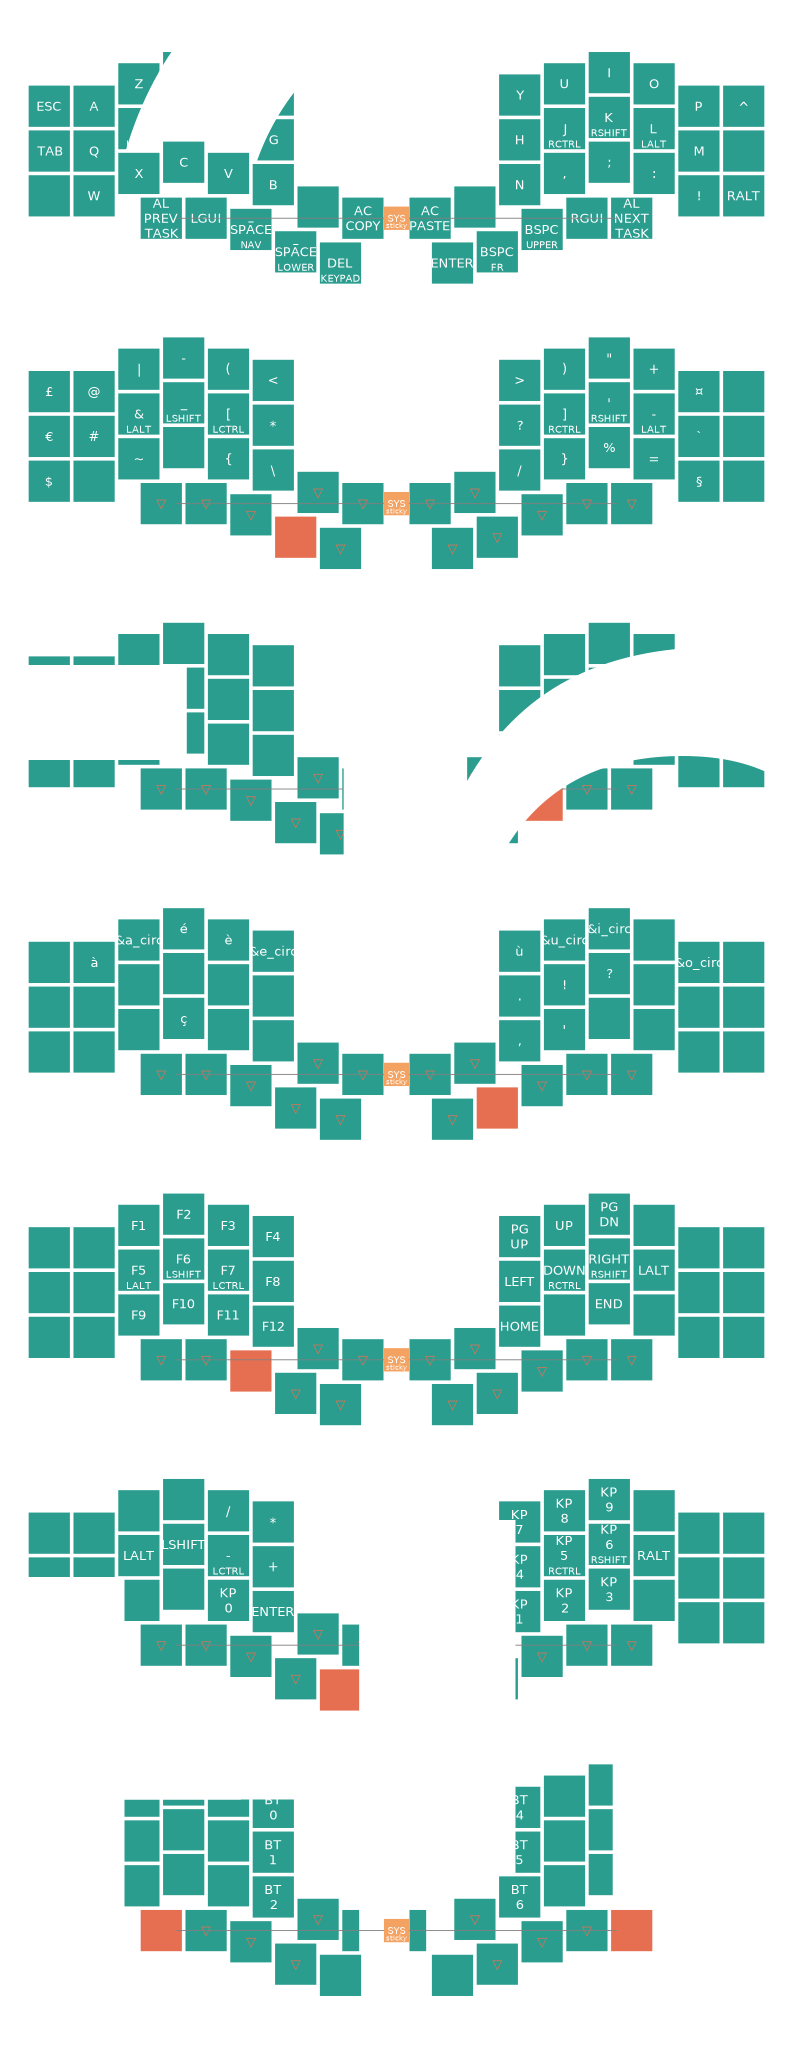

In [5]:
timestamp = 0
while True:
    new_timestamp = os.path.getmtime(file_to_watch)
    if new_timestamp > timestamp:
        timestamp = new_timestamp
        clear_output(True)
        run_parse_and_draw()
        display(SVG(filename="kyria.svg"))
    time.sleep(1)